<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INTRODUCTION</a></span><ul class="toc-item"><li><span><a href="#IMPORT-DATA" data-toc-modified-id="IMPORT-DATA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>IMPORT DATA</a></span></li><li><span><a href="#some-first-EXPLORATION" data-toc-modified-id="some-first-EXPLORATION-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>some first EXPLORATION</a></span></li><li><span><a href="#Target-variables" data-toc-modified-id="Target-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Target variables</a></span></li><li><span><a href="#some-first-random-Model:-RANDOM-MODEL" data-toc-modified-id="some-first-random-Model:-RANDOM-MODEL-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>some first random Model: RANDOM MODEL</a></span></li></ul></li></ul></div>

# INTRODUCTION

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth=300


## IMPORT DATA

In [4]:
# only numerical (except for text)
cces = pd.io.stata.StataReader('data/CCES16.dta')
df = cces.read(convert_categoricals=False)

In [5]:
# with codes in categories
cces = pd.io.stata.StataReader('data/CCES16.dta')
dfn = cces.read()

In [237]:
labels = cces.variable_labels()
labels

{'V101': 'Case ID',
 'commonweight_vv': 'Common content with voter validation weights',
 'commonweight_vv_post': 'Common content with voter validation weights post-election',
 'commonweight_vv_lgbt': 'Weights for LGBT variable analysis',
 'commonweight': 'Common content weights',
 'commonweight_post': 'Common content weights post-election',
 'tookpost': 'Took post-election wave',
 'lookupzip': 'Zip code for mapping CD',
 'inputstate': 'State',
 'cdid113': 'CD 113th/114th Congress',
 'cdid115': 'CD 115th Congress',
 'countyfips': 'County FIPS code',
 'countyname': 'County Name',
 'CurrentGovName': 'Current Governor Name',
 'CurrentGovParty': 'Current Governor Party',
 'CurrentHouseGender': 'Current House Gender',
 'CurrentHouseName': 'Current House Name',
 'CurrentHouseParty': 'Current House Party',
 'CurrentSen1Gender': 'Current Senate 1 Gender',
 'CurrentSen1Name': 'Current Senate 1 Name',
 'CurrentSen1Party': 'Current Senate 1 Party',
 'CurrentSen2Gender': 'Current Senate 2 Gender',


In [7]:
df.shape

(64600, 563)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64600 entries, 0 to 64599
Columns: 563 entries, V101 to dmaname
dtypes: datetime64[ns](4), float64(316), int16(1), int32(1), int8(50), object(191)
memory usage: 255.8+ MB


In [9]:
df.head()

,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,cdid113,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
0,222168628,1.344214,1.042267,1.195346,0.944967,0.730450,1,03442,33,2,...,,,,,2016-10-20 05:05:44.887,2016-10-20 05:36:38.850,2016-11-16 06:24:32.895,2016-11-16 06:40:18.810,NaN,
1,273691199,1.182352,1.280103,1.280565,0.767256,0.892838,1,70118,22,2,...,,,,,2016-10-23 14:54:58.548,2016-10-24 14:20:41.711,2016-11-30 14:02:55.143,2016-11-30 14:09:26.931,622.0,NEW ORLEANS
2,284214415,0.217396,NaN,0.248930,0.090604,0.000000,0,63851,29,8,...,,,,,2016-10-29 06:54:12.797,2016-10-29 07:24:44.759,NaT,NaT,632.0,PADUCAH-CAPE GIRARD-HARSBG
3,287557695,0.532320,NaN,0.928750,0.142583,0.000000,0,36703,1,7,...,,,,,2016-10-27 11:06:21.322,2016-10-27 11:26:00.051,NaT,NaT,698.0,MONTGOMERY-SELMA
4,290387662,1.261106,1.092519,1.161894,1.206498,1.019007,1,80526,8,2,...,,,,,2016-10-10 10:56:31.061,2016-10-10 11:14:12.215,2016-11-18 09:09:28.044,2016-11-18 09:21:05.905,751.0,DENVER


## some first EXPLORATION

In [242]:
dfn.tookpost.value_counts(dropna=False)

Yes    52899
No     11701
Name: tookpost, dtype: int64

In [11]:
dfn.CC16_410a.value_counts(dropna=False)

Hillary Clinton (Democrat)        22136
NaN                               19358
Donald Trump (Republican)         18755
Gary Johnson (Libertarian)         1829
Other                              1136
Jill Stein (Green)                  913
I'm not sure                        229
Evan McMullin (Independent)         163
I didn't vote in this election       81
Name: CC16_410a, dtype: int64

In [12]:
df.CC16_364.value_counts(dropna=False)

1.0    49805
4.0     5211
2.0     4828
5.0     3123
3.0     1521
NaN      112
Name: CC16_364, dtype: int64

In [13]:
df.votereg.value_counts(dropna=False) # registered to vote

1    57066
2     6677
3      857
Name: votereg, dtype: int64

In [14]:
dfn.CC16_401.value_counts(dropna=False)

I definitely voted in the General Election.      45292
NaN                                              15515
I did not vote in the election this November.     1802
I usually vote, but didn't this time.              754
I thought about voting this time - but didn't      750
I attempted to vote but did not or could not.      487
Name: CC16_401, dtype: int64

In [83]:
dft = df[df.tookpost==0]
dft.fillna(999, inplace=True)
pd.crosstab(dft.CC16_410a, dft.CC16_364b, dropna=False)

CC16_364b,1.0,2.0,3.0,4.0,5.0,6.0,7.0,999.0
CC16_410a,,,,,,,,
999.0,71,128,29,11,8,8,9,11437


In [16]:
pd.crosstab(dfn.CC16_364, dfn.CC16_401)

CC16_401,I did not vote in the election this November.,I thought about voting this time - but didn't,"I usually vote, but didn't this time.",I attempted to vote but did not or could not.,I definitely voted in the General Election.
CC16_364,,,,,
"Yes, definitely",530,207,313,291,40933
Probably,375,267,240,112,2154
I already voted (early or absentee),10,9,8,8,1209
No,481,88,65,17,262
Undecided,399,178,127,59,667


## Target variables

In [17]:
df = df.assign(voted=df.CC16_401.apply(lambda x: 1 if x == 5 else (0 if x < 5 else np.nan)))
df.voted[df.CC16_410a==6] = 0

df = df.assign(president=df.CC16_410a.apply(lambda x: np.nan if (x==6 or x==7) else (3 if x > 2 else x)))


/Users/geschew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df.voted.value_counts(dropna=False)

1.0    45211
NaN    15515
0.0     3874
Name: voted, dtype: int64

In [20]:
df.president.value_counts(dropna=False)

2.0    22136
NaN    19668
1.0    18755
3.0     4041
Name: president, dtype: int64

## some first random Model: RANDOM MODEL

In [89]:
cces.variable_labels()

{'V101': 'Case ID',
 'commonweight_vv': 'Common content with voter validation weights',
 'commonweight_vv_post': 'Common content with voter validation weights post-election',
 'commonweight_vv_lgbt': 'Weights for LGBT variable analysis',
 'commonweight': 'Common content weights',
 'commonweight_post': 'Common content weights post-election',
 'tookpost': 'Took post-election wave',
 'lookupzip': 'Zip code for mapping CD',
 'inputstate': 'State',
 'cdid113': 'CD 113th/114th Congress',
 'cdid115': 'CD 115th Congress',
 'countyfips': 'County FIPS code',
 'countyname': 'County Name',
 'CurrentGovName': 'Current Governor Name',
 'CurrentGovParty': 'Current Governor Party',
 'CurrentHouseGender': 'Current House Gender',
 'CurrentHouseName': 'Current House Name',
 'CurrentHouseParty': 'Current House Party',
 'CurrentSen1Gender': 'Current Senate 1 Gender',
 'CurrentSen1Name': 'Current Senate 1 Name',
 'CurrentSen1Party': 'Current Senate 1 Party',
 'CurrentSen2Gender': 'Current Senate 2 Gender',


In [227]:
#df_m = df.copy()
#df_m.president[df_m.voted == 0] = 4
df_m = df[df.president<=2]
df_m.dropna(subset=['president'], inplace=True)
df_m.fillna(999, inplace=True)


y = df_m.president

# only demographic
df_m.drop(df_m.loc[:, 'V101':'votereg_f'].columns, axis = 1, inplace=True)
df_m.drop(['ccesmodule', 'CC16_421a', 'CC16_421_rep', 'CC16_421_dem', 'ideo5', 'cdid115_post', 'cdid113_post'], axis=1, inplace=True)
df_m.drop(df_m.loc[:, 'CC16_301a':'CC16_302'].columns, axis = 1, inplace=True)
df_m.drop(df_m.loc[:, 'CC16_307':'CC16_360'].columns, axis = 1, inplace=True)
df_m.drop(df_m.loc[:, 'CC16_364':'CC16_367x_t'].columns, axis = 1, inplace=True)
df_m.drop(df_m.loc[:, 'pid3':'pid7'].columns, axis = 1, inplace=True)
df_m.drop(df_m.loc[:, 'votereg_post':'CC16_427_f'].columns, axis = 1, inplace=True)
df_m.drop(df_m.loc[:, 'CL_matched':].columns, axis = 1, inplace=True)

#df_m.drop(df_m.loc[:, 'V101':'add_confirm'].columns, axis = 1, inplace=True)
#df_m.drop(['ccesmodule', 'pid3', 'pid7', 'CC16_421a', 'CC16_421_rep', 'CC16_421_dem'], axis=1, inplace=True)
#df_m.drop(df_m.loc[:, 'CC16_340j':'CC16_340o'].columns, axis = 1, inplace=True)
#df_m.drop(df_m.loc[:, 'CC16_364':'CC16_367x_t'].columns, axis = 1, inplace=True) 
#df_m.drop(df_m.loc[:, 'CC16_401':'CC16_413d'].columns, axis = 1, inplace=True) 
#df_m.drop(df_m.loc[:, 'CL_matched':].columns, axis = 1, inplace=True)
df_m.drop(df_m.select_dtypes('object').columns, axis=1, inplace=True)

X = df_m

/Users/geschew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/geschew/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
/Users/geschew/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19, stratify=y)

In [229]:
rnc = RandomForestClassifier(n_estimators=100, random_state=19, n_jobs=-1, verbose=1)
rnc.fit(X_train, y_train)
pred = rnc.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [230]:
confusion_matrix(y_test, pred)

array([[4278, 1349],
       [1070, 5571]])

In [231]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.80      0.76      0.78      5627
         2.0       0.81      0.84      0.82      6641

    accuracy                           0.80     12268
   macro avg       0.80      0.80      0.80     12268
weighted avg       0.80      0.80      0.80     12268



In [232]:
X = pd.DataFrame(X)
cols = list(df_m.columns.values)
X.columns = cols

In [233]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:7]]
    values = importances[indices][:7]

    # Creat the plot
    fig = plt.figure(figsize = (15,8))
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(7), values, width = 0.5, align="center", color = '#FF4343', \
          label = "Feature Weight")
    plt.bar(np.arange(7) - 0.3, np.cumsum(values), width = 0.5, align = "center", color = 'k', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation=70)
    plt.xlim((-0.5, 6.5))
    plt.ylabel("Weight", fontsize = 16)
    plt.xlabel("Feature", fontsize = 16)
    
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('font', size=16)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

/Users/geschew/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


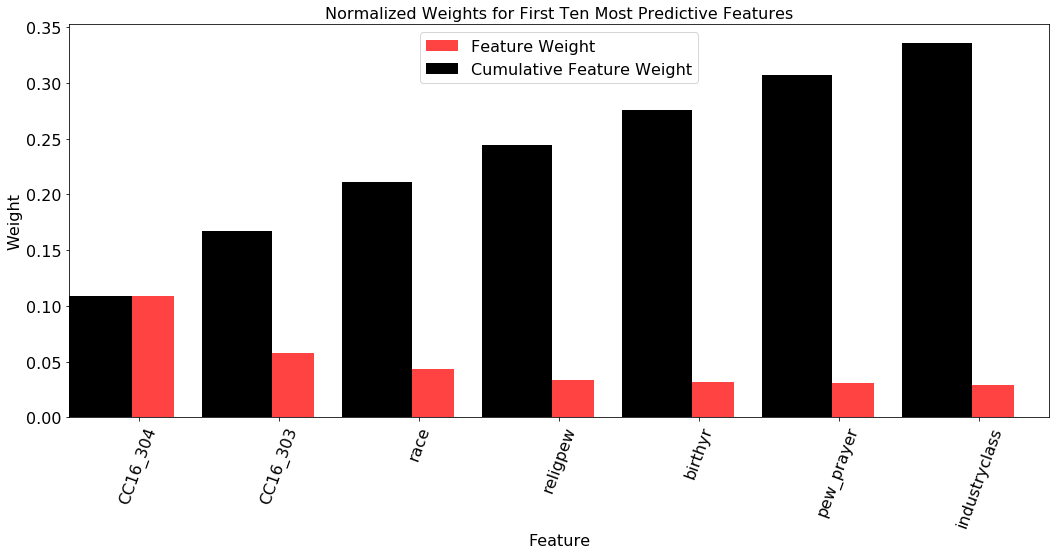

In [234]:
# TODO: Train the supervised model on the training set 
model = RandomForestClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

---

Benchmark: 80% precision and recall for only demografic variables, 97% if opinions are included